# Tutorial – Session 1

## Sandsynlighed, stokastiske variable og deskriptiv statistik i Python

I denne tutorial arbejder vi med centrale begreber fra sandsynlighedsteori og statistik ved hjælp af Python. Formålet er at koble de teoretiske begreber fra Ross (kapitel 1–3) med konkrete data og beregninger, som I senere skal bruge gennem hele kurset.

Vi vil især fokusere på:

- stokastiske variable
- forventningsværdi og varians
- deskriptiv statistik
- sammenhængen mellem sandsynlighedsmodeller og data

---

## 1. Python som statistisk værktøj

I dette kursus bruger vi Python til al praktisk statistik. I denne session anvender vi primært:

- NumPy til numeriske beregninger
- Pandas til datahåndtering
- Matplotlib til simple visualiseringer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

## 2. Stokastiske variable og simulation

En **stokastisk variabel** er en numerisk beskrivelse af udfaldet af et tilfældigt eksperiment. I stedet for kun at arbejde teoretisk kan vi simulere sådanne variable direkte i Python.

Vi starter med et simpelt eksempel: et fair terningekast.

In [2]:
np.random.seed(42)

terningekast = np.random.randint(1, 7, size=1000)
terningekast[:10]

array([4, 5, 3, 5, 5, 2, 3, 3, 3, 5], dtype=int32)

Her genererer vi en række tilfældige terningekast og gemmer resultaterne i variablen `terningekast`. Hver værdi svarer til ét udfald af den stokastiske variabel \( X \), som angiver antallet af øjne ved et kast med en fair seks-sidet terning.

- `np.random.seed(42)` sørger for, at vi får de samme tilfældige tal hver gang vi kører koden. Tallet 42 er blot et vilkårligt valgt "seed" – du kan bruge et hvilket som helst andet tal, men med samme seed får du replikerbare resultater.
- `np.random.randint(1, 7, size=1000)` laver 1000 tilfældige heltal mellem 1 og 6 (inklusiv 1, eksklusiv 7 – derfor står der 7). Det svarer altså til at kaste en terning 1000 gange.
- `terningekast[:10]` viser de første 10 kast, så vi hurtigt kan se, hvordan dataene ser ud.

På den måde simulerer vi et eksperiment og får konkrete data at arbejde videre med.

---

## 3. Forventningsværdi og varians

Ifølge teorien er forventningsværdien middelværdien af en stokastisk variabel, mens variansen beskriver spredningen omkring denne middelværdi.

Vi beregner disse direkte fra vores simulerede data.

In [3]:
# Beregning af populationsparametre (antager alle kast udgør hele populationen)
middelværdi_population = np.mean(terningekast)
varians_population = np.var(terningekast)
std_afvigelse_population = np.std(terningekast)

# Beregning af stikprøveparametre (antager kastene er en stikprøve)
middelværdi_stikprøve = np.mean(terningekast)
varians_stikprøve = np.var(terningekast, ddof=1)
std_afvigelse_stikprøve = np.std(terningekast, ddof=1)

print("Population: middelværdi =", middelværdi_population, 
      ", varians =", varians_population, 
      ", std_afvigelse =", std_afvigelse_population)
print("Stikprøve: varians =", varians_stikprøve, 
      ", std_afvigelse =", std_afvigelse_stikprøve)

Population: middelværdi = 3.457 , varians = 2.9361509999999997 , std_afvigelse = 1.7135200611606507
Stikprøve: varians = 2.93909009009009 , std_afvigelse = 1.7143774642971978


Sammenlign disse værdier med de teoretiske resultater for et fair terningekast:

* Forventningsværdi: 3.5
* Varians: $ \frac{35}{12} \approx 2.92 $


Læg også mærke til forskellen mellem populationsvarians og stikprøvevarians. I eksemplet her er forskellen mellem de to mål meget lille, fordi vi har en stor stikprøve (1000 kast). Jo større stikprøven er, jo tættere ligger stikprøvevariansen typisk på populationsvariansen.

---

## 4. Fra stokastisk variabel til data

Når vi arbejder med rigtige data, optræder stokastiske variable som kolonner i et datasæt. Vi lægger derfor vores data i en Pandas DataFrame.

In [4]:
df = pd.DataFrame({
    "kast": terningekast
})

df.head()

,kast
0,4
1,5
2,3
3,5
4,5


Dette er ofte den datastruktur, vi vil arbejde med i resten af kurset – uanset om data kommer fra CSV-filer, databaser eller er organiseret på andre måder.

---

## 5. Deskriptiv statistik

Deskriptiv statistik bruges til at opsummere og forstå data, før vi foretager statistisk inferens.

Vi har allerede set på gennemsnit, varians og standardafvigelse i afsnit 3. Her fokuserer vi i stedet på median, typetal (mode) og percentiler.

### Median og typetal (mode)

In [13]:
median = df["kast"].median()
mode = df["kast"].mode()
print(f"Medianen er: {median}")
print(f"Typetal (mode) er: {', '.join(map(str, mode.values))}")

Medianen er: 4.0
Typetal (mode) er: 1


* **Medianen** er 50%-percentilen og er robust over for outliers
* **Typetal** er den værdi, der forekommer oftest

### Percentiler og kvartiler

Percentiler fortæller, hvor en observation ligger i fordelingen.
90-percentilen betyder, at 90% af observationerne er mindre end eller lig med denne værdi.
Kvartiler er 25%-, 50%- og 75%-percentilerne.
Og hvis du i stedet arbejder med numpy så bruger du `np.percentile` med værdier fra 0 til 100.

In [6]:
percentiler = df["kast"].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
percentiler

0.10    1.0
0.25    2.0
0.50    4.0
0.75    5.0
0.90    6.0
Name: kast, dtype: float64

**Quantile vs. percentile:**

- I Pandas bruges `quantile` og forventer tal mellem 0 og 1.
- I NumPy bruges `percentile` og forventer tal mellem 0 og 100.

De viser det samme, bare i forskellig skala.

In [7]:
pandas_p90 = df["kast"].quantile(0.90)
numpy_p90 = np.percentile(df["kast"], 90)

pandas_p90, numpy_p90

(np.float64(6.0), np.float64(6.0))

---

### Interkvartilafstand (IQR)

IQR er et robust mål for spredning og defineres som forskellen mellem 3. og 1. kvartil (Q3 - Q1).
Og hvis du i stedet arbejder med numpy så kan du finde kvartilerne med `np.percentile`.

In [8]:
q1 = df["kast"].quantile(0.25)
q2 = df["kast"].quantile(0.50)
q3 = df["kast"].quantile(0.75)
iqr = q3 - q1

q1, q2, q3, iqr

(np.float64(2.0), np.float64(4.0), np.float64(5.0), np.float64(3.0))

Her gør vi præcis det samme med NumPy, men angiver percentiler som 25, 50 og 75 i stedet for 0.25, 0.50 og 0.75.

In [9]:
q1_np, q2_np, q3_np = np.percentile(df["kast"], [25, 50, 75])
iqr_np = q3_np - q1_np

q1_np, q2_np, q3_np, iqr_np

(np.float64(2.0), np.float64(4.0), np.float64(5.0), np.float64(3.0))

---

## 6. Visualisering af data

Visualisering er et vigtigt redskab til at forstå fordelingen af data.

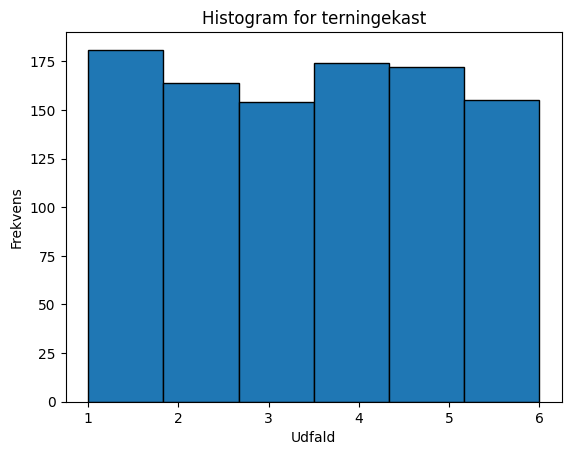

In [10]:
plt.hist(df["kast"], bins=6, edgecolor="black")
plt.xlabel("Udfald")
plt.ylabel("Frekvens")
plt.title("Histogram for terningekast")
plt.show()

Histogrammet giver et visuelt billede af fordelingen og gør det nemt at vurdere, om data stemmer overens med vores forventninger.

---

## 7. Normalfordelingen – et første kig

Mange statistiske metoder bygger på antagelsen om normalfordeling. Vi ser derfor kort på, hvordan normalfordelingen kan simuleres.

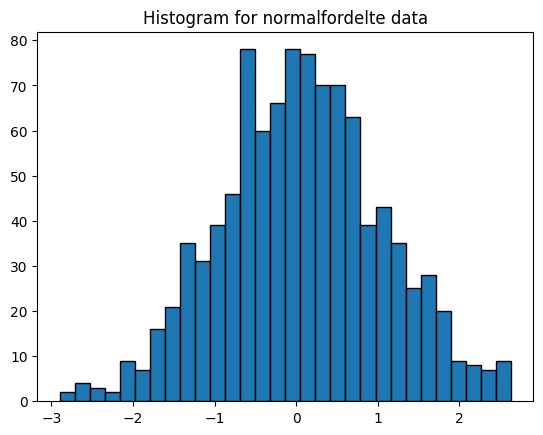

In [11]:
normal_data = np.random.normal(loc=0, scale=1, size=1000)

plt.hist(normal_data, bins=30, edgecolor="black")
plt.title("Histogram for normalfordelte data")
plt.show()

I de kommende sessioner vil vi arbejde mere systematisk med normalfordelingen og dens rolle i statistisk inferens.

---

## 8. Opsummering

I denne tutorial har du:

* arbejdet med stokastiske variable via simulation
* beregnet forventningsværdi, varians og standardafvigelse
* anvendt deskriptiv statistik på data
* set sammenhængen mellem teori og empiriske observationer
* fået et første indblik i normalfordelingen

Disse begreber og værktøjer udgør fundamentet for resten af kurset og vil blive anvendt igen og igen i mere avancerede sammenhænge.